In [1]:
%matplotlib inline
import camelot
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import zipfile

plt.style.use('scottoplot')
%config InlineBackend.figure_format = 'retina'

## Step 1: Import MWRA Biobot sewage dataset

In [2]:
# import tables using gridlines to define columns ("lattice" method)
tables = camelot.read_pdf("../data/raw/MWRAData20201126-data.pdf", flavor="lattice", pages="all")

In [3]:
# Assemble them into one dataframe
df = pd.DataFrame()
for t in tables:
    df = df.append(t.df)

In [4]:
# take column names from first row
df.columns = df.iloc[0]
# clean them up
df.columns = df.columns.str.replace('\n', '').str.strip()
# delete original first row
df.drop(df.index[0], inplace=True)
# replace blank strings with NaN
df.replace('', np.nan, inplace=True)
# convert data types of columns
df['Sample Date'] = pd.to_datetime(df['Sample Date'])
df[['Southern (copies/mL)', 'Northern (copies/mL)']] = df[['Southern (copies/mL)', 'Northern (copies/mL)']].apply(pd.to_numeric)
#df[['Southern (copies/mL)', 'Northern (copies/mL)']] = df[['Southern (copies/mL)', 'Northern (copies/mL)']].apply(np.int64)
# set index
df = df.set_index("Sample Date")

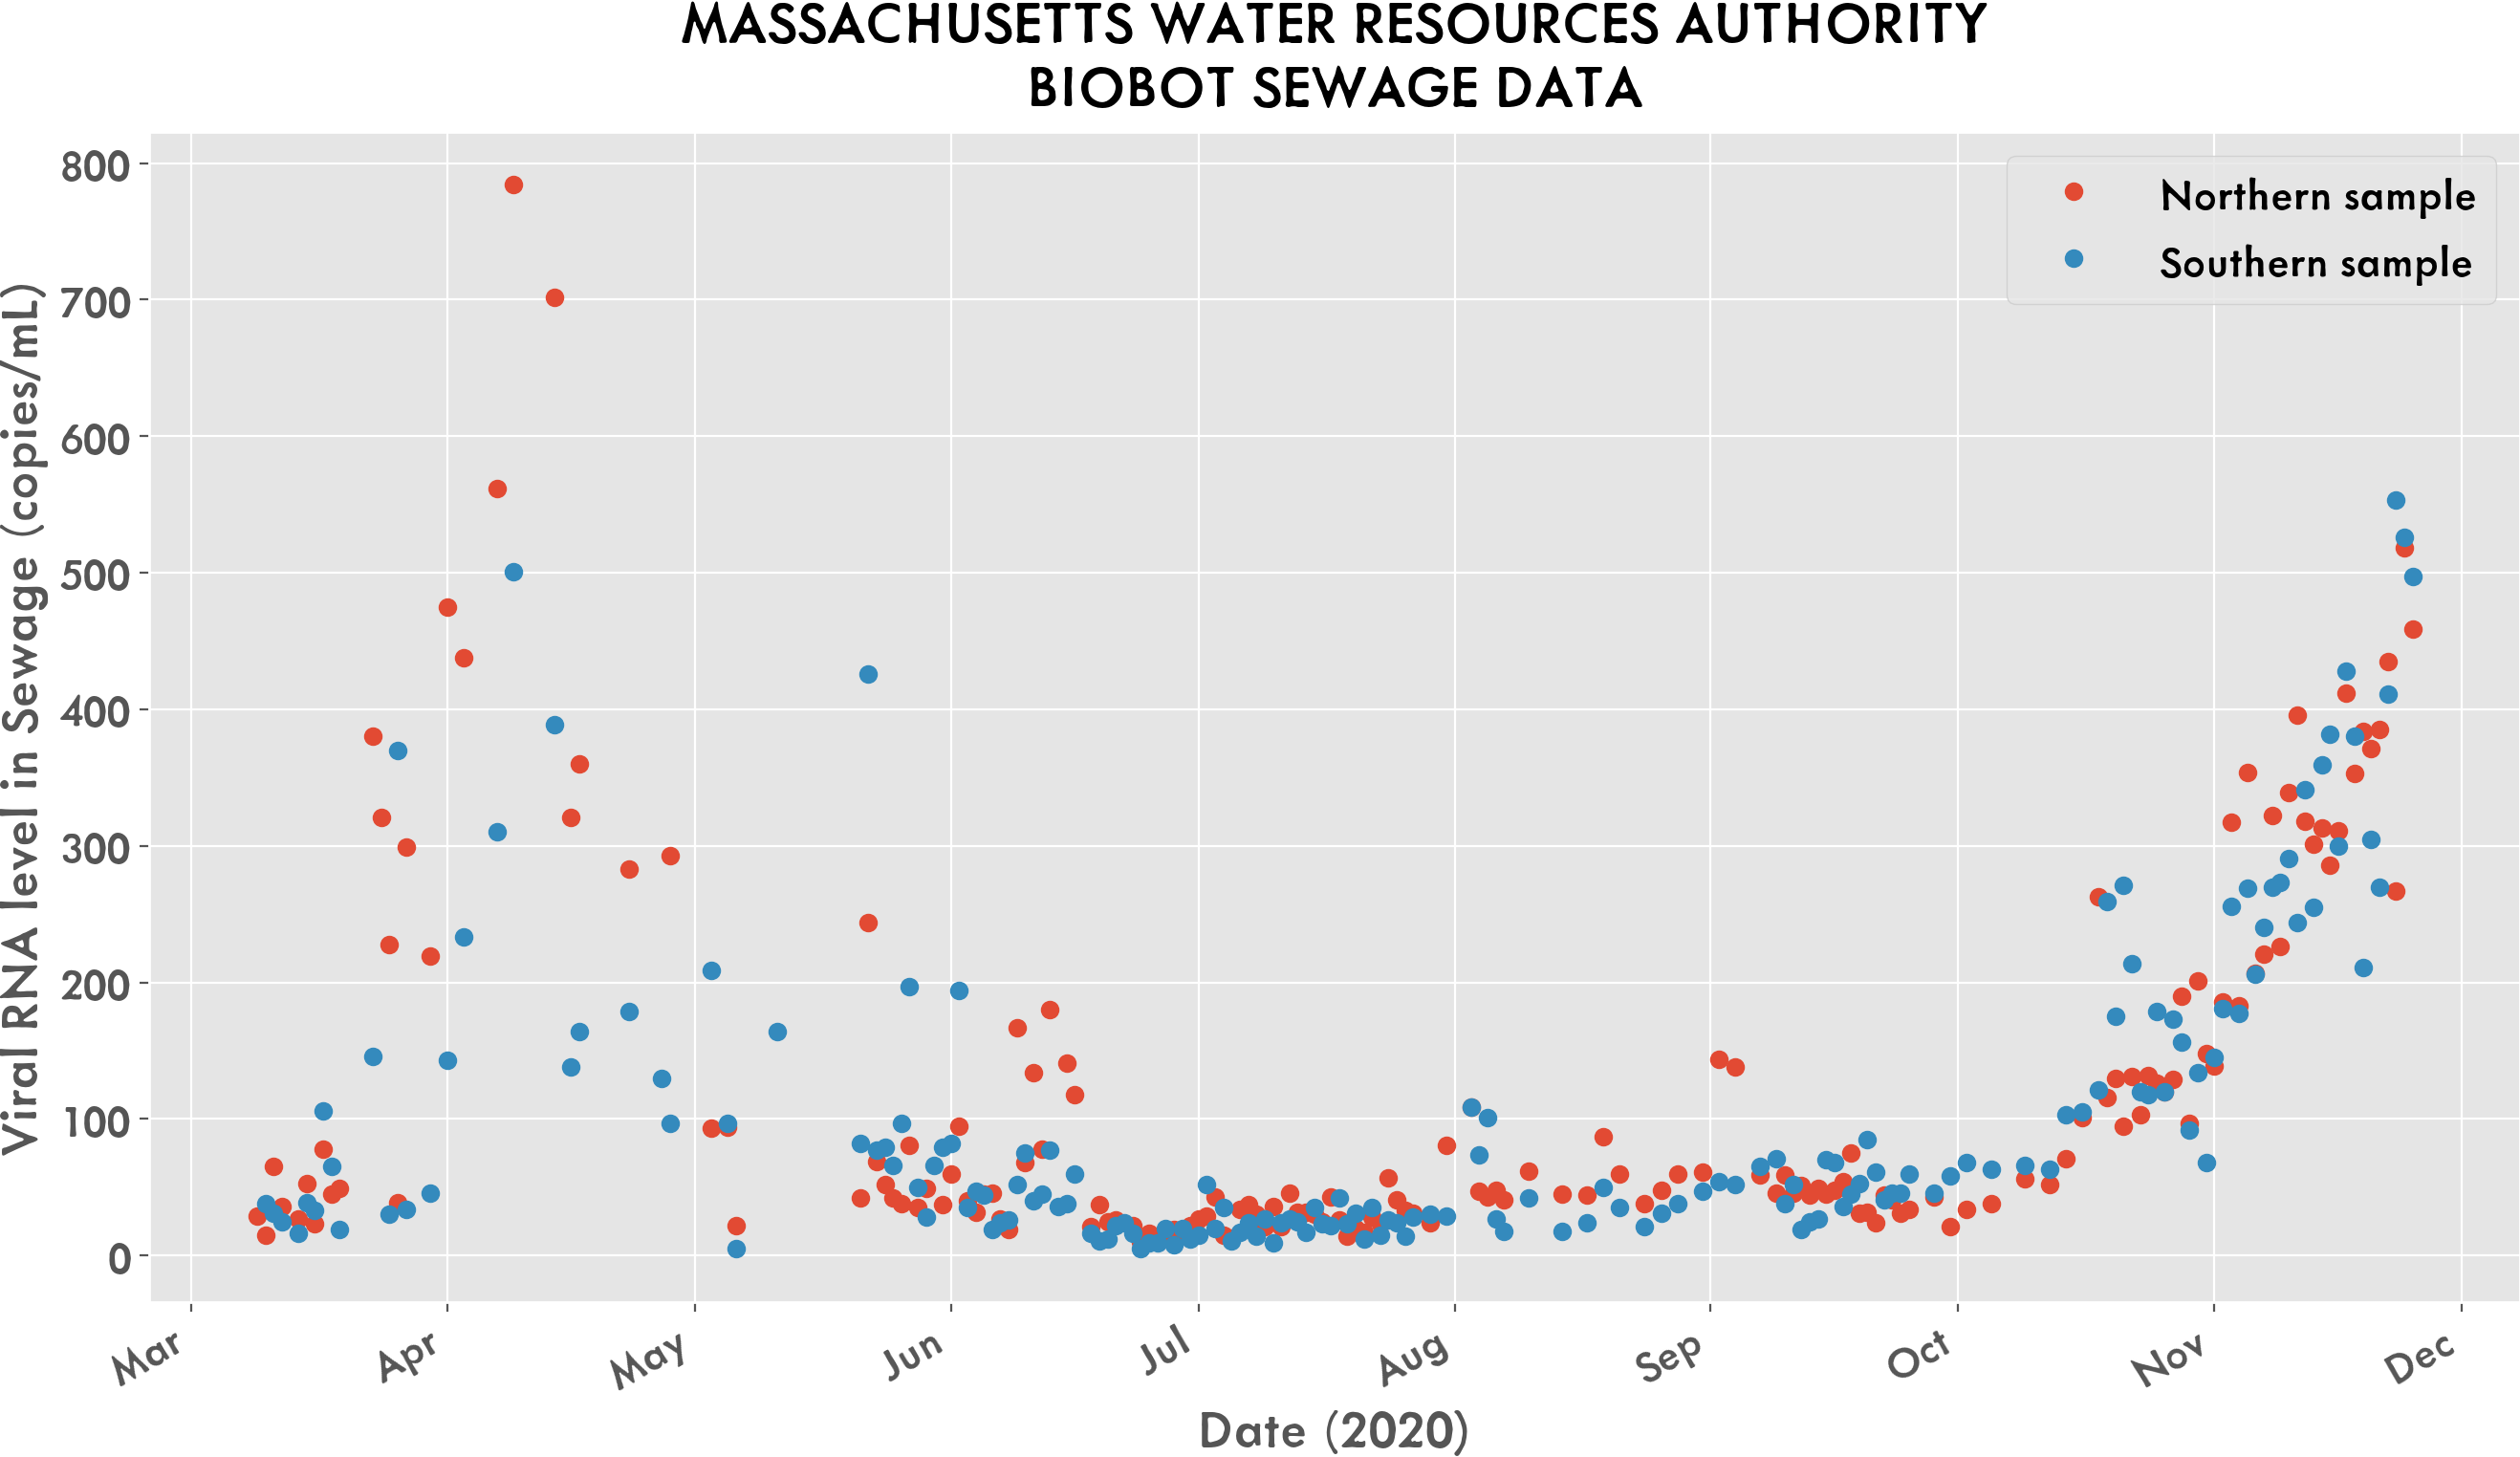

In [12]:
fig, ax = plt.subplots(figsize=(16,9))
df.plot(ax=ax, y='Northern (copies/mL)', label="Northern sample", marker='o', ls='none')
df.plot(ax=ax, y='Southern (copies/mL)', label="Southern sample", marker='o', ls='none')
#ax2 = df_mega.plot(ax=ax, secondary_y=True, y='Total number of confirmed COVID patients in hospital today', label="Hospital COVID patients")
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
ax.set_xlabel("Date (2020)")
ax.set_ylabel("Viral RNA level in Sewage (copies/mL)")
#ax2.set_ylabel("Number of confirmed patients")
#plt.legend(loc="upper center")
plt.title("Massachusetts Water Resources Authority\nBiobot Sewage Data".upper());

In [13]:
fig.savefig('covid-data-biobotonly.png', bbox_inches='tight', pad_inches=0, transparent=True)

## Step 2. Import State of Massachusetts COVID dataset.

In [6]:
archive = zipfile.ZipFile('../data/raw/covid-19-dashboard_11-29-2020.zip', 'r')
xlfile = archive.open('Hospitalization from Hospitals.xlsx')
df_hosp = pd.read_excel(xlfile)
df_hosp = df_hosp.set_index('Date')

In [7]:
df_hosp.head(5)

,Total number of confirmed COVID patients in hospital today,Net new number of confirmed COVID patients in hospital today,7 day average of confirmed COVID hospitalizations,Confirmed ICU,Net New number ICU,Confirmed intubated,Net New number intubated
Date,,,,,,,
2020-04-04,1370,NaN,NaN,438,242,NaN,NaN
2020-04-05,1632,262.0,NaN,526,88,NaN,NaN
2020-04-06,1677,45.0,NaN,542,16,NaN,NaN
2020-04-07,1831,154.0,NaN,575,33,NaN,NaN
2020-04-08,2119,288.0,NaN,659,84,NaN,NaN


In [8]:
# make combined dataset
df_mega = df.join(df_hosp)

In [9]:
df_mega.head(5)

,Southern (copies/mL),Northern (copies/mL),Southern 7 day avg,Northern 7 day avg,Southern Low Confidence Interval,Southern High Confidence Interval,Northern Low Confidence Interval,Northern High Confidence Interval,Total number of confirmed COVID patients in hospital today,Net new number of confirmed COVID patients in hospital today,7 day average of confirmed COVID hospitalizations,Confirmed ICU,Net New number ICU,Confirmed intubated,Net New number intubated
Sample Date,,,,,,,,,,,,,,,
2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:21: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.2)


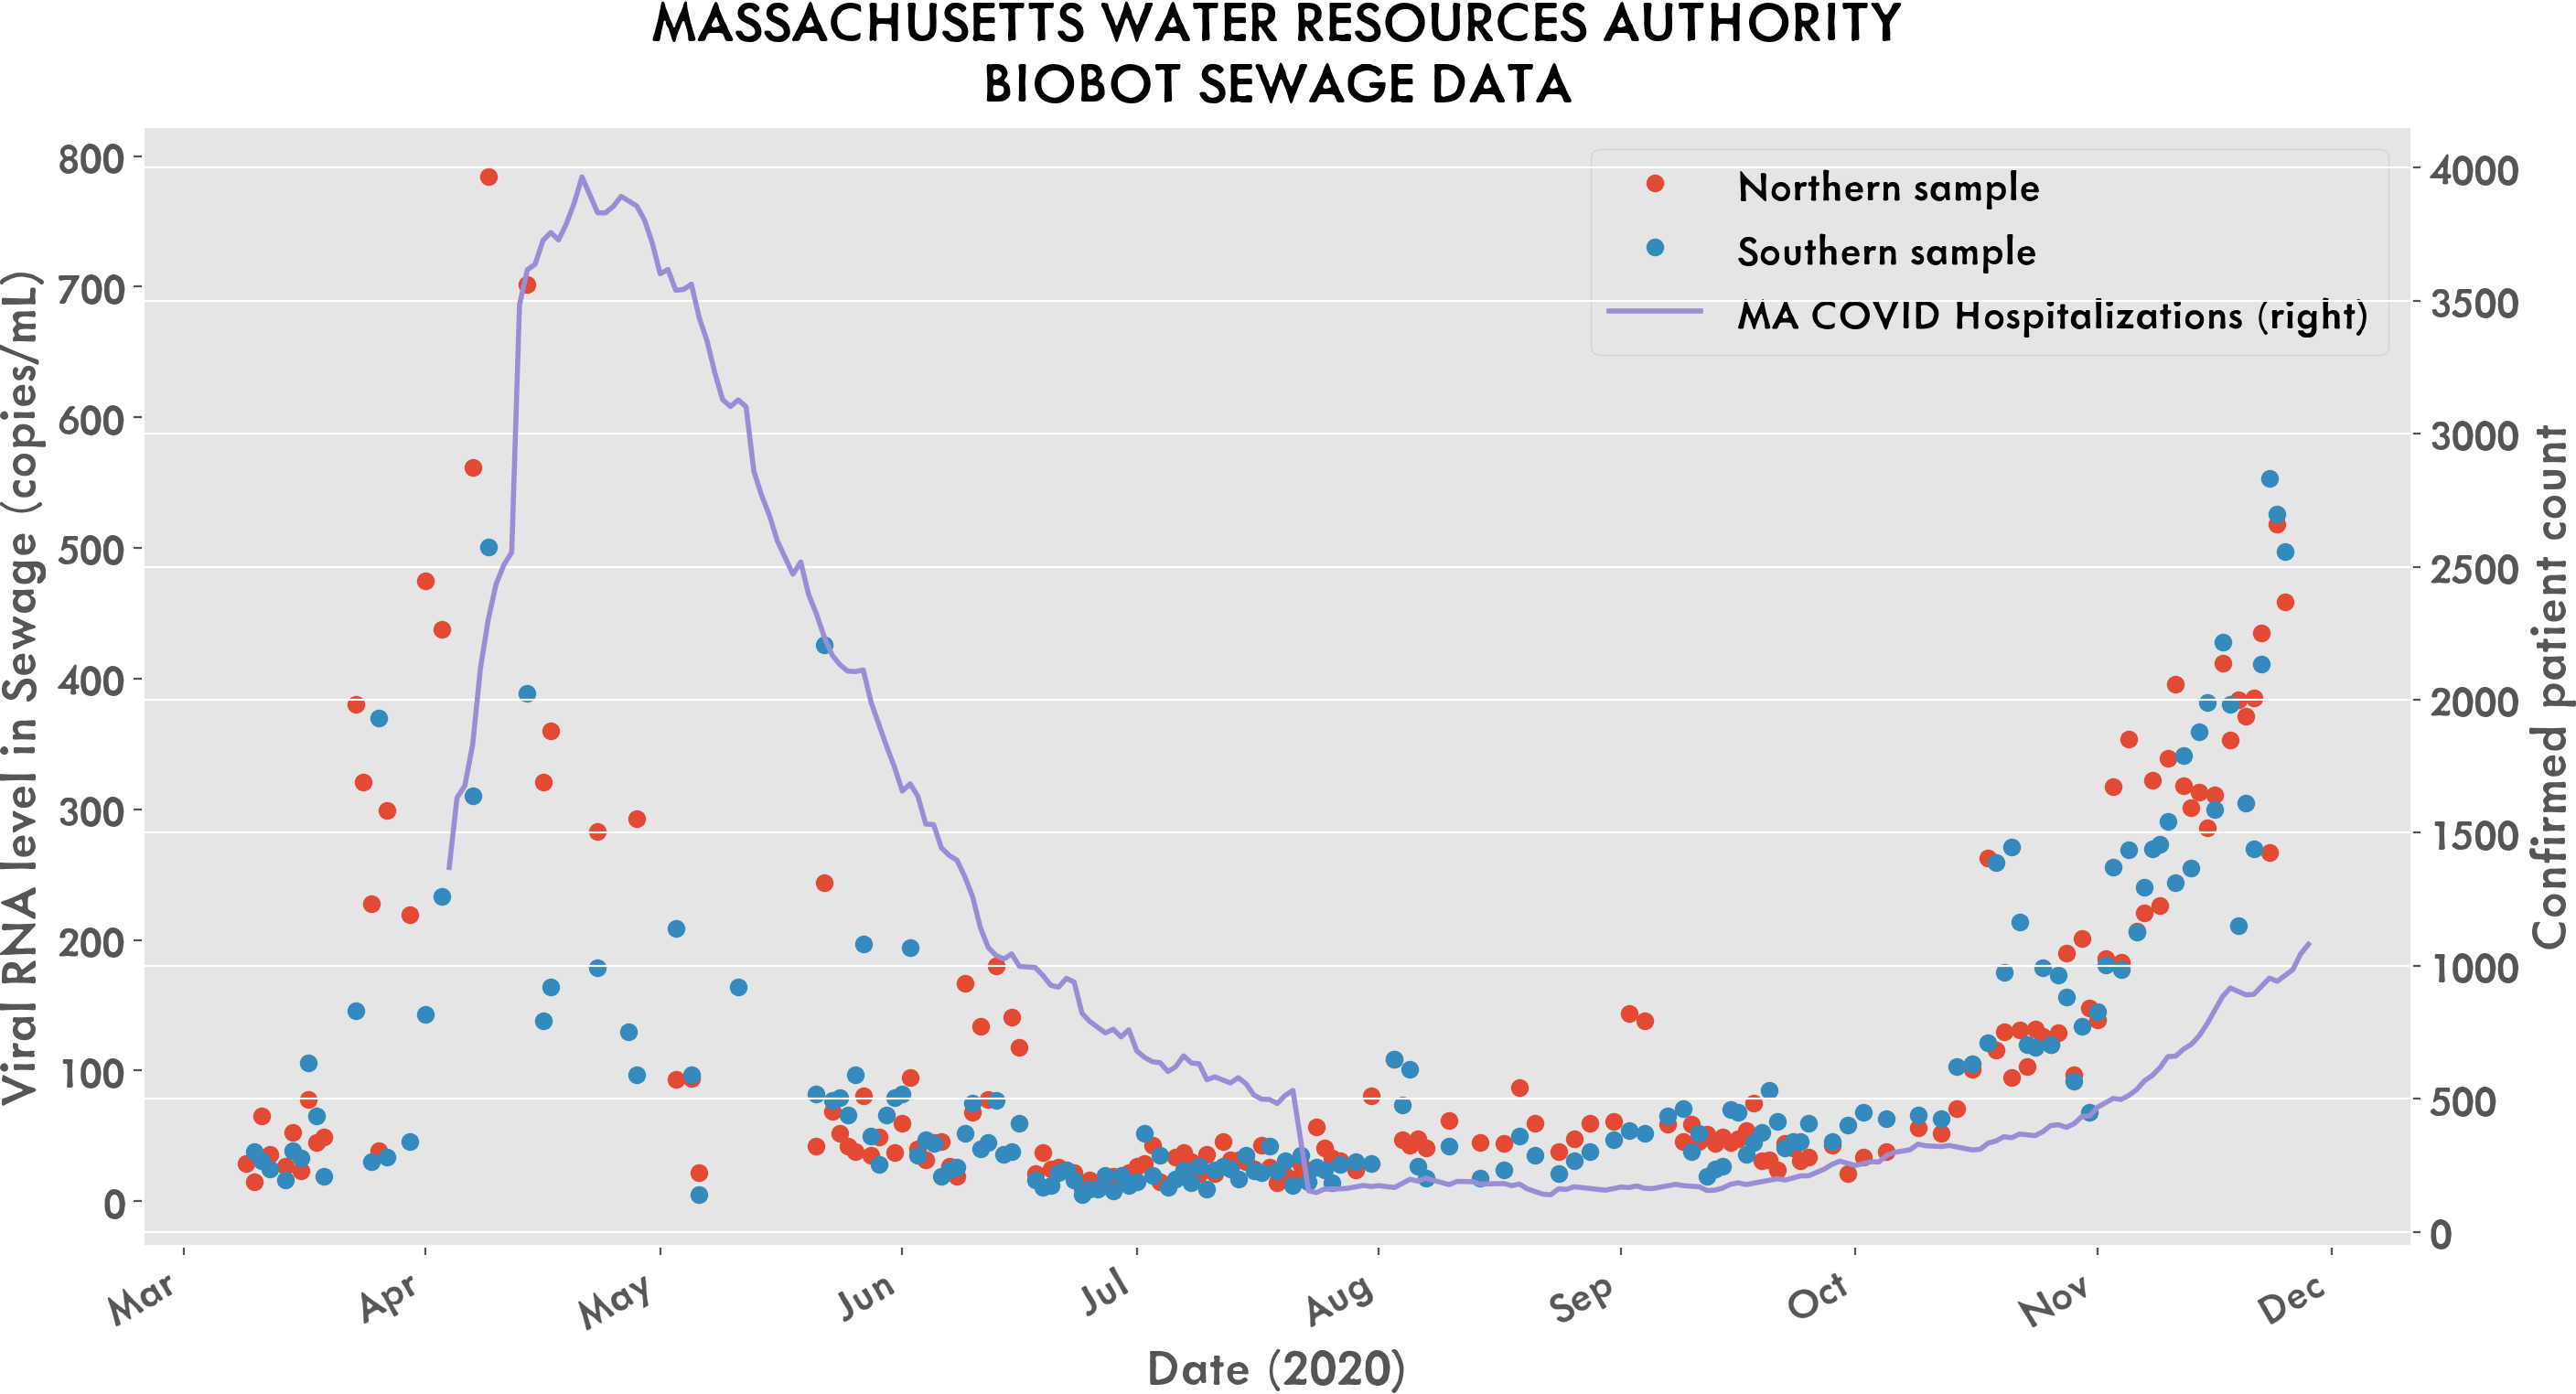

In [10]:
fig, ax = plt.subplots(figsize=(16,9))
df_mega.plot(ax=ax, y='Northern (copies/mL)', label="Northern sample", marker='o', ls='none')
df_mega.plot(ax=ax, y='Southern (copies/mL)', label="Southern sample", marker='o', ls='none')
ax2 = df_mega.plot(ax=ax, secondary_y=True, y='Total number of confirmed COVID patients in hospital today', label="MA COVID Hospitalizations")
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
ax.set_xlabel("Date (2020)")
ax.set_ylabel("Viral RNA level in Sewage (copies/mL)")
ax2.set_ylabel("Confirmed patient count")
#plt.legend(loc="upper center")
plt.title("Massachusetts Water Resources Authority\nBiobot Sewage Data".upper());

In [11]:
fig.savefig('covid-data-combined-with-hospitalization.png', bbox_inches='tight', pad_inches=0, transparent=True)